# INTRODUCTION
1.The information is a replica of the abalone dataset from the UCI repository.The original owner of database is US Census Bureau.
(https://drive.google.com/open?id=17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN)

2.perfoCensusrm a detailed data discription on this dataset with the following sections.

3.Discover and handle missing values :remove the row where missing value occur,remove 'fnlwgt' column ,percentage of rows that where removed.

4.Perform Univariate Analysis ( PDF, Histograms,Boxplots,Countplots,etc) to understand the distribution of each numerical column.

5.Perform Bivariate Analysis (relationships between numerical columns using scatter plots ,hexbin plots ,pair plots ,etc)to identify patterns using swamplot,boxplot,barplot,etc.

6.conclusion and write observations .

7.Perform feature transformation : For Numerical Feature -> Do Column Normalization i.e. use MinMaxScaler For Categorical ->if more than 2 categories use dummy variables .otherwise convert the feature to binary.

8.Write your observations in english and always quantity your results.

# The Adult dataset

DESCRIPTION

1. Title of dataset: adult.csv

2. Sources:

 * Original owners of database - US Census Bureau

 * Donor of database - Ronny Kohavi and Barry Becker

 * Date received - 05/19/96 

3. Past Usage:

(a) Complete reference of article where it was described/used
@inproceedings{kohavi-nbtree,
author={Ron Kohavi},
title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid},
booktitle={Proceedings of the Second International Conference on Knowledge Discovery and Data Mining},
year = 1996,
pages={to appear}}

(b) Indication of what attribute(s) were being predicted
Salary greater or less than 50,000.

(c) Indication of study's results (i.e. Is it a good domain to use?)
Hard domain with a nice number of records.

4. Relevant Information Paragraph:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

5. Number of Instances
 
 * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
 
 * 45222 if instances with unknown values are removed (train=30162, test=15060)
 
 * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

6. Number of Attributes

 6 continuous, 8 nominal attributes.


7. Attribute Information:

 * age: continuous.
 
 * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 
 * fnlwgt: continuous.
 
 * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 
 * education-num: continuous.
 
 * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 
 * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 
 * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 
 * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 
 * sex: Female, Male.
 
 * capital-gain: continuous.
 
 * capital-loss: continuous.
 
 * hours-per-week: continuous.
 
 * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 
 * class: >50K, <=50K

8. Missing Attribute Values:

7% have missing values.

9. Class Distribution:

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

10. Notes for Delve

 * One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
 
 * Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
 
 * The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.


 
 
 

# OBJECTIVE

The main objective of the dataset is to classify people earning <=50k or >50k based on several explanatory factors affecting the income of a person like Age ,Occupation ,Education,etc.

The methods we intend to use are :

 * binary logistic regression 
 * decision tree
 * random forest

In [2]:
# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read dataset
missing_val =['?']
df = pd.read_csv("adult.csv",na_values=missing_val)

In [39]:
# Display the top five rows of dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
# How many columns and rows there in dataset
df.shape

(48842, 15)

In [42]:
# Display the descriptive statistical analysis on numerical columns of the dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# DISCOVER AND HANDLE MISSING VALUES

In [4]:
total_rows = len(df)
del_row = df.isnull().any(axis = 1).sum()
print(total_rows, del_row)


48842 3620


In [5]:
# row with atleast one missing value
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [6]:
#remove all the missing values by removing the rows where missing value occur
df.dropna(axis = 0 ,how ='any',inplace =True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
#remove fnlwgt column
df.drop(['fnlwgt'] , axis=1, inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
current_rows = len(df)
print(current_rows)


45222


In [9]:
#show the pecentage of rows that were removed while handling missing values
print("percentage of rows that were removed:",100* (del_row/total_rows),"%")

percentage of rows that were removed: 7.411653904426519 %


# UNIVARIATE ANALYSIS

#    1.HISTOHRAMS

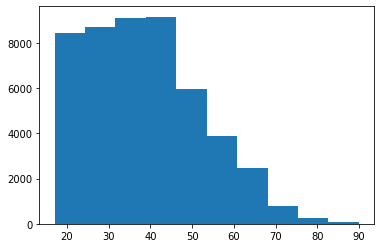

In [132]:
plt.hist(df['age'])
plt.show()

# OBSERVATION
* The age of people is between 17 to 90 that is minimum and maximum age is 17 and 90 respectively.


* younger age people work more than old age people.


* we see that the majority of people earning  more than 50k a year are between 33 and 55 years old,whereas the greatest number of people who earn less than 50k a year are between 18 and 45.
 

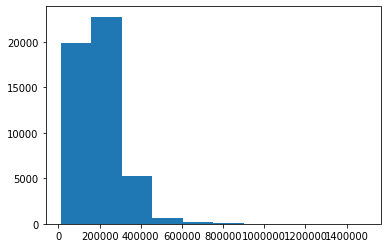

In [136]:
plt.hist(df ['fnlwgt'])
plt.show()

# OBSERVATION

* In this histogram of fnlwgt it is rightly skwed.


* The fnlwgt is the sampling weight.

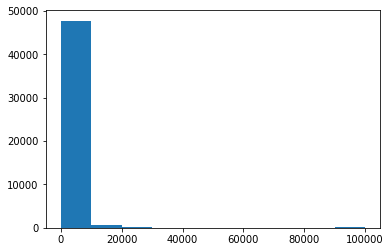

In [141]:
plt.hist(df['capital-gain'])
plt.show()

# OBSERVATION

 * In this histogram capital- gain of the person has gain of very large amount of no gain.

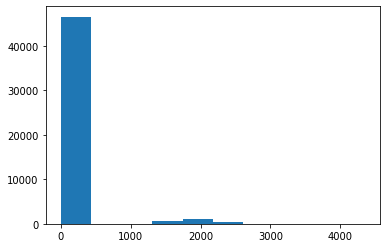

In [142]:
plt.hist(df['capital-loss'])
plt.show()

# OBSERVATION

* In this the capital-loss most values are centered at zero and very few are non-zero.


* This attribute is similar to the capital-gain.

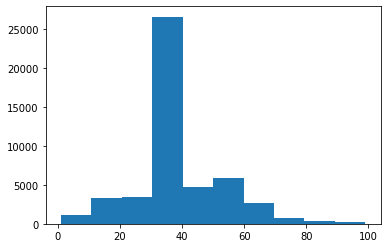

In [144]:
plt.hist(df['hours-per-week'])
plt.show()

# OBSERVATION

 * In the histogram hours-per-week attributes varies within the range 1 to 99.
 
 
 * very less people work for 80 to 100 hours-per-week.
 
 
 * maximum people work 30 to 40 hours-per-week.


#    2. BOXPLOTS

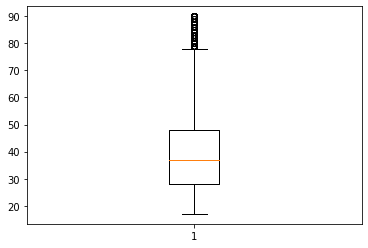

In [145]:
plt.boxplot(df['age'])
plt.show()

# OBSERVATION

 * The summary shows that at least 50% of the people in the study are between 28 and 47 years old,which makes sense since the participants in the survey should be of working age.
 
 
 * There are some outliers ,such as individuals being between 75 and 90 years old.

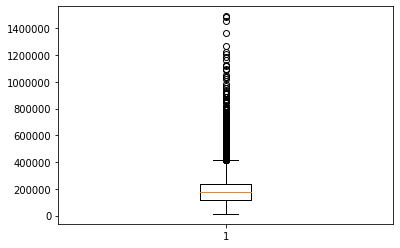

In [147]:
plt.boxplot(df['fnlwgt'])
plt.show()

# OBSERVATION

 * 'fnlwgt' attribute that is used by census ,as the inverse of sampling fraction adjusted for non-response and over or under       sampling of particular groups.
 
 *  we can see that there is so many out     This attribute does not convey individual related meaning. 
 

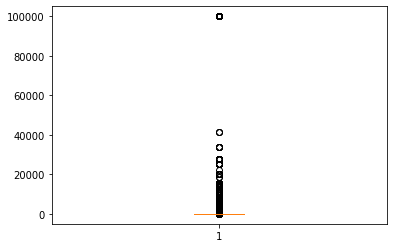

In [149]:
plt.boxplot(df['capital-gain'])
plt.show()

# OBSERVATION

 * we can see that for people earning more than 50k a year the bulk of the values ( 50 % of the data points) as well as the        median ,and the mean value of the capital gain are significantly greater than these of people earning less than 50k.
 
 
 * we can see that there are so many outliers .

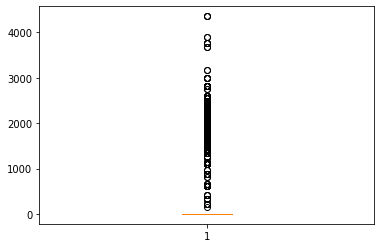

In [150]:
plt.boxplot(df['capital-loss'])
plt.show()

# OBSERVATION

 * we observe that the tendency of capital-gain and capital-loss is same.
 
 
 * The mean and median for people having an income of more than 50k a year is bigger than that of people earning less than 50k    a year. this might be due to the fact that people with higher income are more prone to invest more money more often.
 
 
 * This leads to higher chances of not only good but also bad investments resulting in bigger losses.

# OBSERVATION

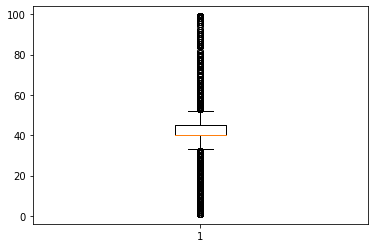

In [151]:
plt.boxplot(df['hours-per-week'])
plt.show()

# OBSERVATION

 * The mean number of working hours per week is 41 and atleast 50% of the participants in the study work between 40 and 45        hours per week.
 
 
 * we show the boxplot of "hours-per-week " which visualizes the summary statistic.
 
 
 * we see that there are many outliers ,i.e. there are many people who work less than 40 hours a week or more than 45 hours a      week.

#    3. COUNTPLOTS

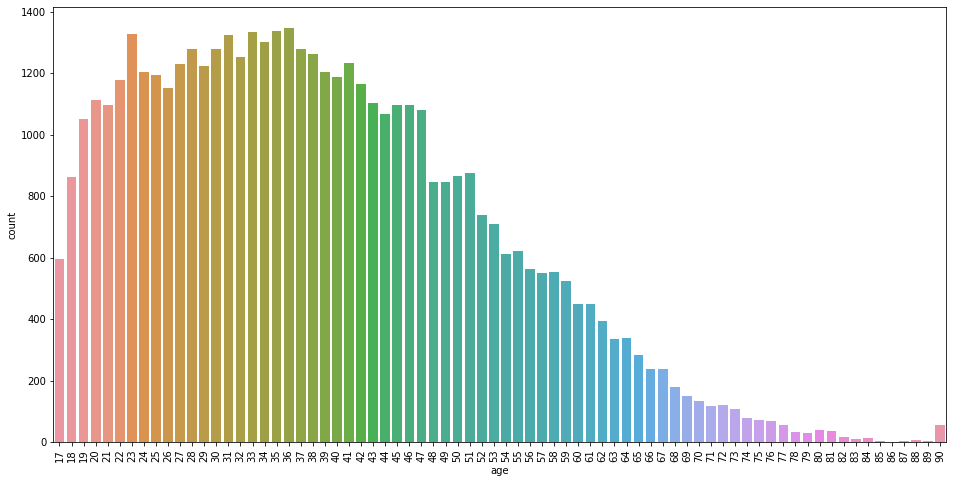

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(df.age)
plt.xticks(rotation=90)
plt.show()

# OBSERVATION

 * It is noticed that majority of the observations make less than 50k a year.for those do make less than 50k a year.for those      do make over 50k annually,they are mainly in midcareer.interestingly,females are underrepresented.this could be possibly      caused by census bias.

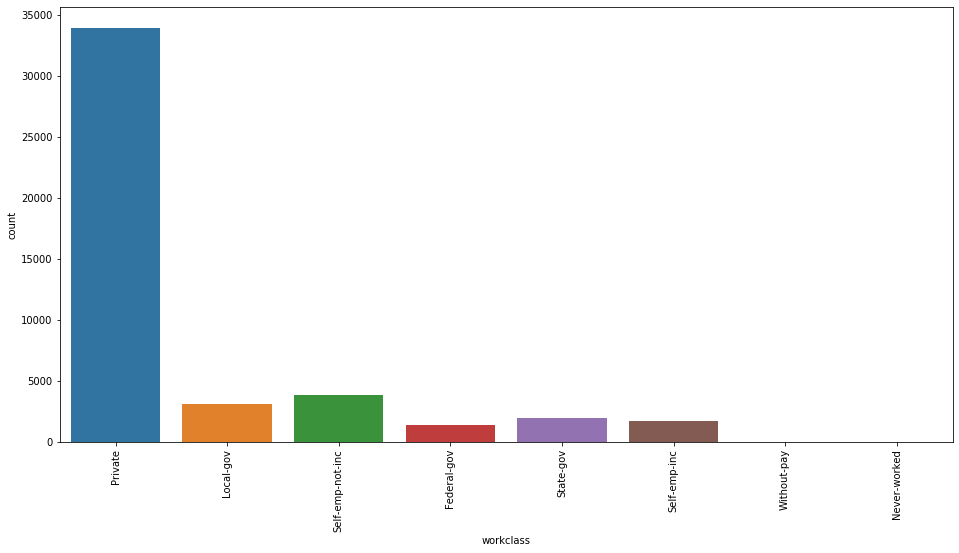

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(df.workclass)
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

 * There are two small-groups never-worked and without-pay .I will combine them with unknowns into a group called                  other/known.those who work in the government are further break down into federal ,state,and local levels.to facilitate the    analysis,I grouped them into one group called government.while those who are self-employed fall into two groups ,            incorporated and not incoporated ,and are grouped into self-employed. 

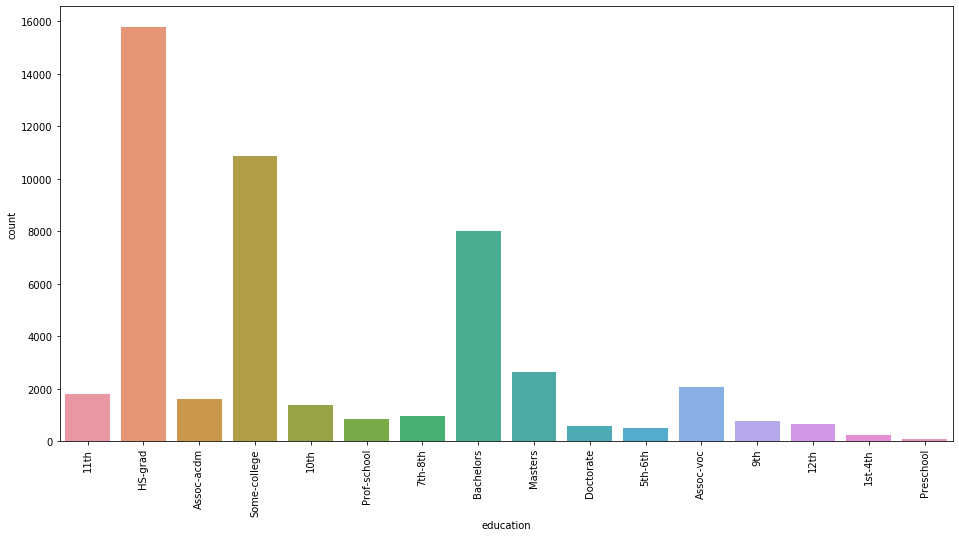

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(df.education)
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS
   
   There are 16 different categories present in the education attribute.hs-grad has the maximum count and preschool has
   minimum count.

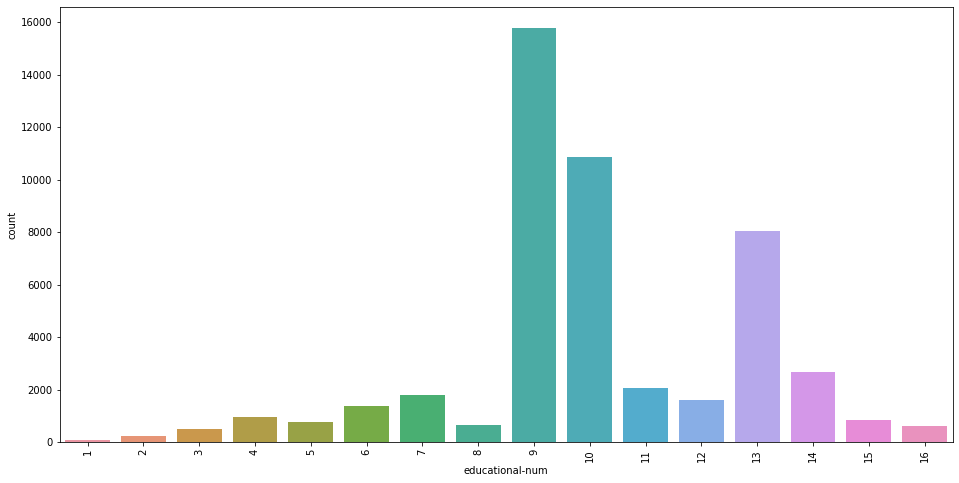

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(df['educational-num'])
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

   It is not hard to notice that the in group proportion ofmaking greater than 50k a year increase as the years of education
   increases. for those who do not have any forms of college education(less than or equal to 8 years of education),less than
   10% have an annual income of greater than 50k.while for those with doctorate degrees, nearly 3 out of 4 makes greater than 
   50k a year.

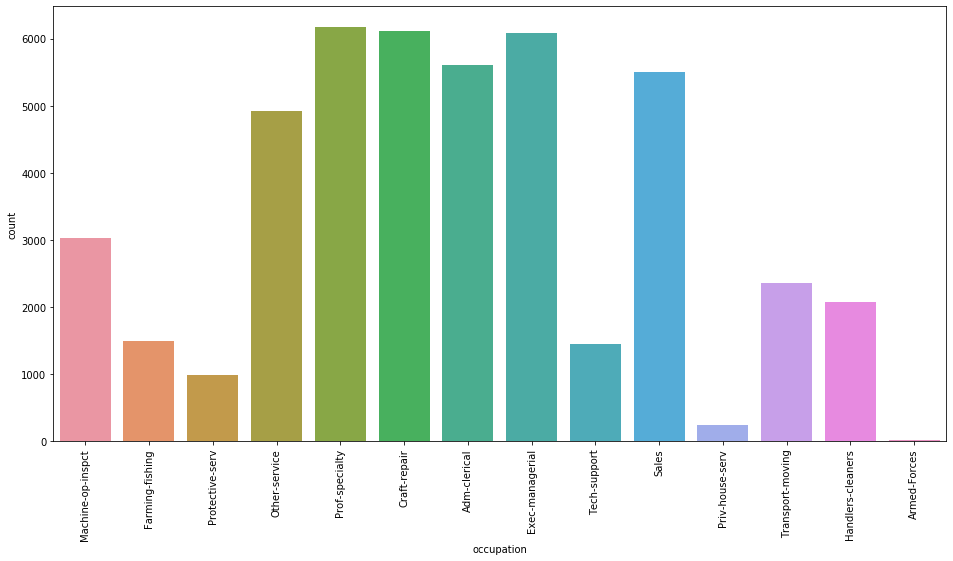

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(df.occupation)
plt.xticks(rotation=90)
plt.show()

# observation
 
  It is noticed that income varies greatly across different occupations.nearly half of professional occupation makes greater
  than 50k a year.while that percentage is only 13% for service occupation.
   

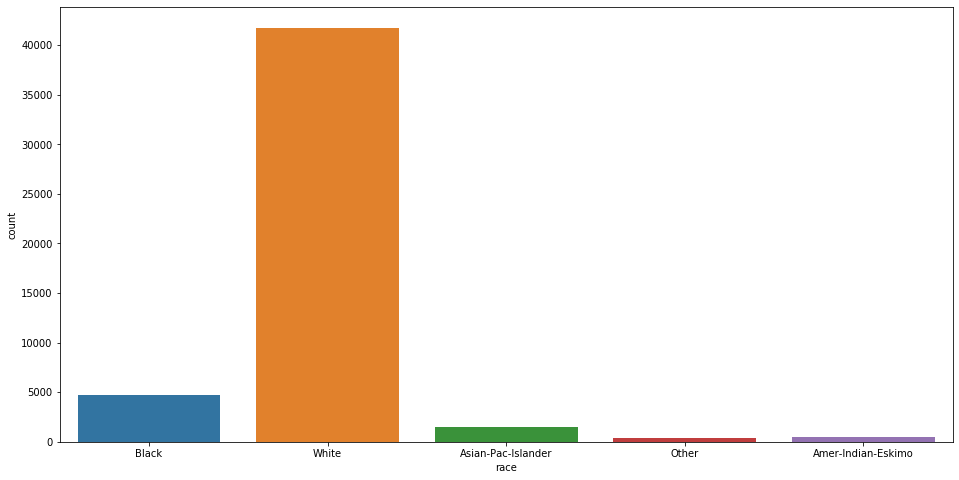

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(df.race)
plt.show()

# OBSEVATIONS

   Race is categorical variable.white and asian-pacific islander have high earning potentials -over 25% of the observations of
   these 2 races makes above 50k annualy.

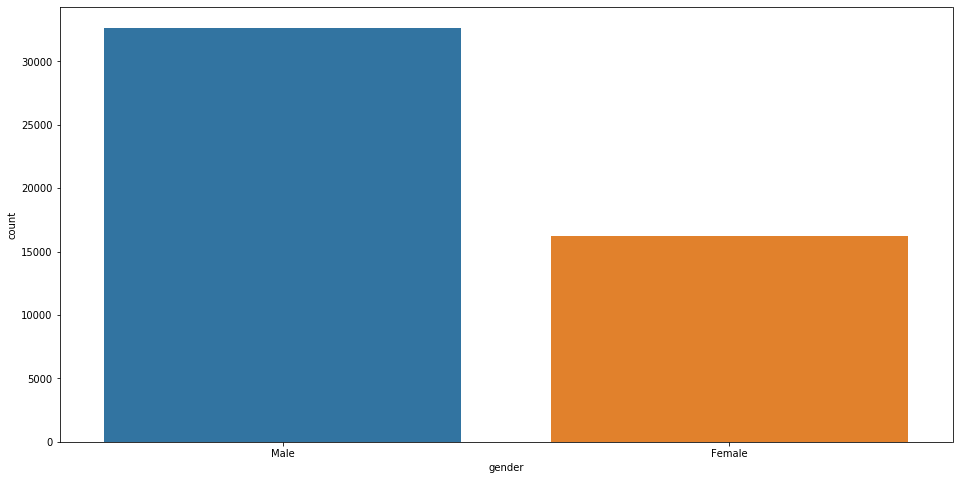

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(df.gender)
plt.show()

# OBSERVATION

   Gender has two categories male and female. male are comparetively more than female.

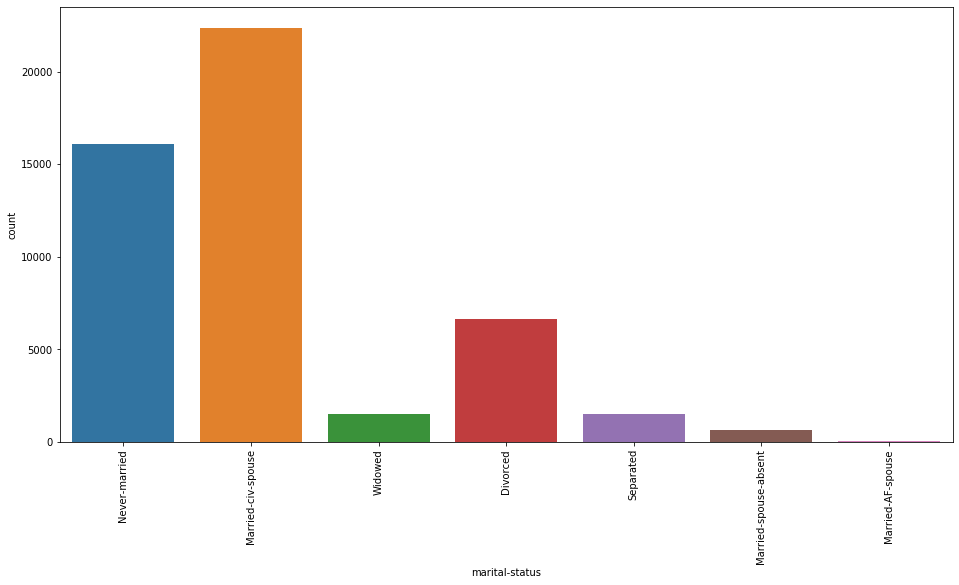

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(df['marital-status'])
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

   Marital-status is a categorical variable with 7 categories indicating the marital status of observations.for those
   who are married, nearly half of them are making greater than 50k a year.

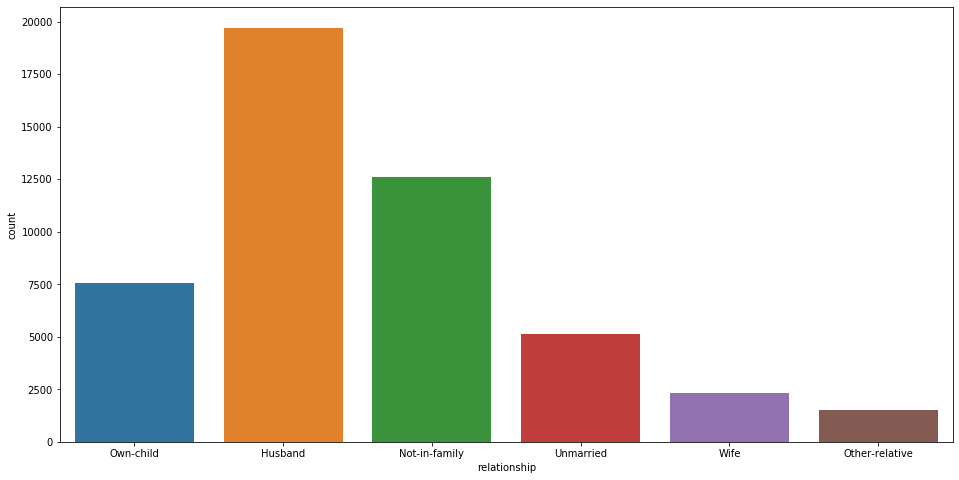

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(df.relationship)
plt.show()

# OBSERVATION
   
   There are 6 different categories present in the relationship attribute. husband has maximum percentage among all the
   categories.

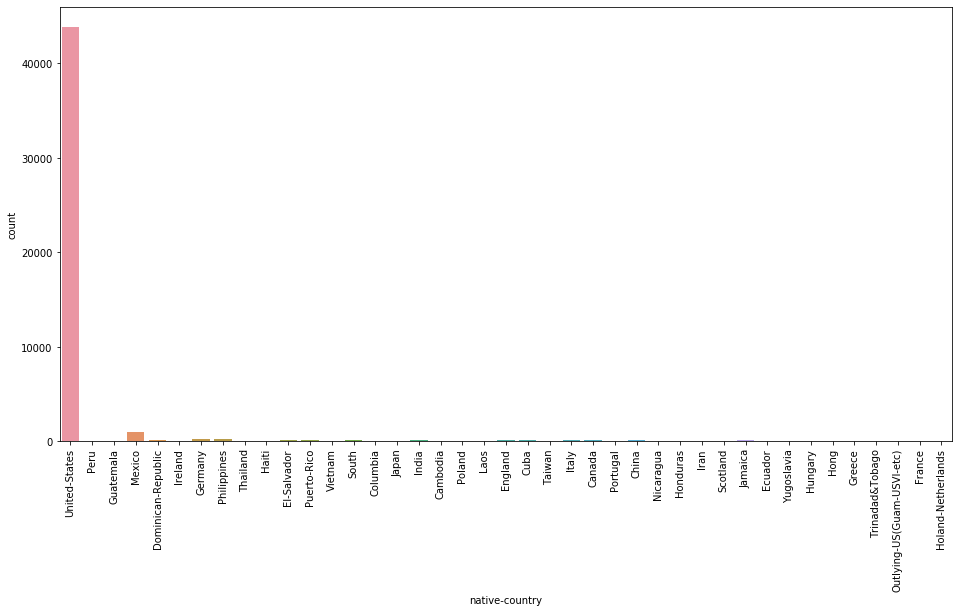

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(df['native-country'])
plt.xticks(rotation=90)
plt.show()

# OBSERVATIONS

   native-country displays high skewness as most observations are united states.therefore, these variables are excluded from      the analysis as well.

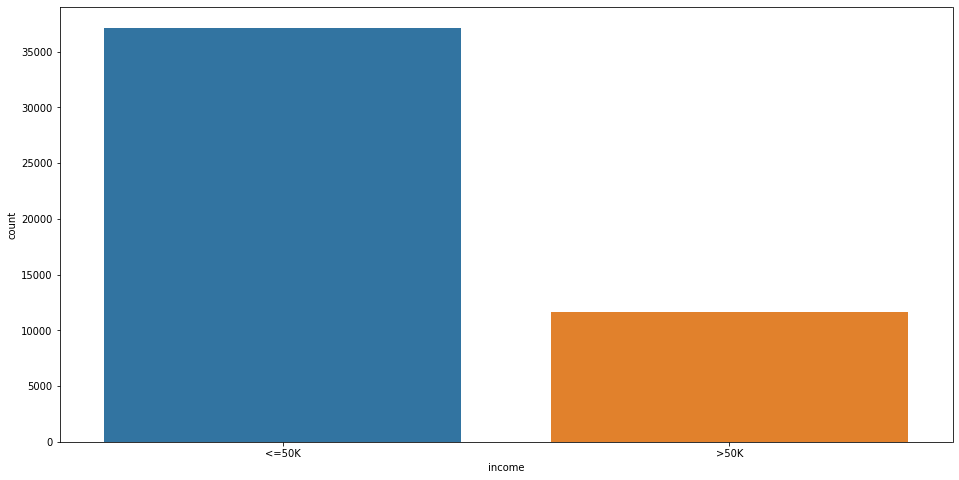

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(df.income)
plt.show()

# OBSERVATION
   
   Income has two categories less than equal to 50k and greater than 50k.

#    4. PDF

pdf= [0.1726383  0.17783875 0.18672454 0.18748209 0.1221285  0.07935793
 0.05028459 0.01590844 0.00567135 0.00196552]
bin_edges= [17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ]


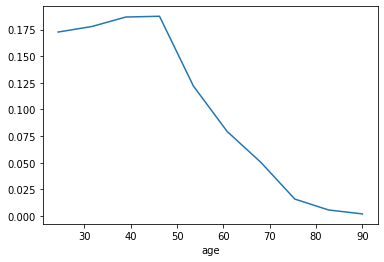

In [28]:
counts, bin_edges = np.histogram(df['age'], bins=10,density = True)
plt.xlabel('age')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# OBSERVATION
    
  * Minimum and maximum age of the people is 17 and 90 repectively.  

pdf= [4.08234716e-01 4.66606609e-01 1.06977601e-01 1.37791245e-02
 3.09160149e-03 7.16596372e-04 3.07112731e-04 1.43319274e-04
 6.14225462e-05 8.18967282e-05]
bin_edges= [  12285.   160096.5  307908.   455719.5  603531.   751342.5  899154.
 1046965.5 1194777.  1342588.5 1490400. ]


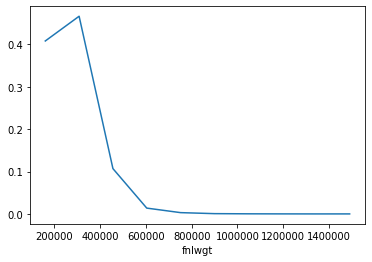

In [24]:
count,bin_edges = np.histogram(df['fnlwgt'], bins=10,density = True)
plt.xlabel('fnlwgt')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

pdf= [0.00675648 0.01042136 0.03503133 0.02843864 0.05055076 0.32316449
 0.26491544 0.03277917 0.21870521 0.02923713]
bin_edges= [ 1.   2.5  4.   5.5  7.   8.5 10.  11.5 13.  14.5 16. ]


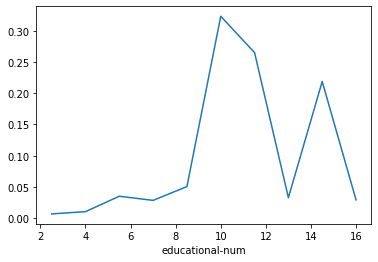

In [27]:
counts, bin_edges = np.histogram(df['educational-num'], bins=10,density = True)
plt.xlabel('educational-num')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# OBSERVATION
   
   * Through this plot we can state highest frequency is between individuals year of receiving education is between 8-9.

pdf= [9.76782278e-01 1.54170591e-02 2.62069530e-03 1.22845092e-04
 6.14225462e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.99570042e-03]
bin_edges= [    0.   9999.9 19999.8 29999.7 39999.6 49999.5 59999.4 69999.3 79999.2
 89999.1 99999. ]


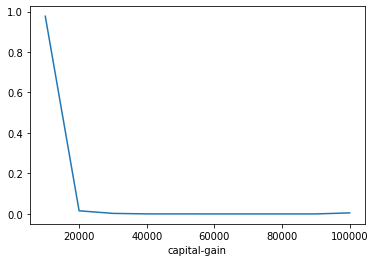

In [30]:
counts, bin_edges = np.histogram(df['capital-gain'], bins=10,density = True)
plt.xlabel('capital-gain')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

pdf= [9.53564555e-01 4.70906187e-04 5.93751280e-04 1.44547725e-02
 2.39343188e-02 6.28557389e-03 4.29957823e-04 4.09483641e-05
 1.63793456e-04 6.14225462e-05]
bin_edges= [   0.   435.6  871.2 1306.8 1742.4 2178.  2613.6 3049.2 3484.8 3920.4
 4356. ]


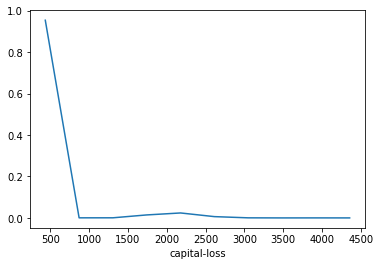

In [31]:
counts, bin_edges = np.histogram(df['capital-loss'], bins=10,density = True)
plt.xlabel('capital-loss')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

pdf= [0.02303345 0.06813808 0.06957127 0.54541174 0.0956349  0.11932353
 0.05409279 0.01398387 0.00644937 0.004361  ]
bin_edges= [ 1.  10.8 20.6 30.4 40.2 50.  59.8 69.6 79.4 89.2 99. ]


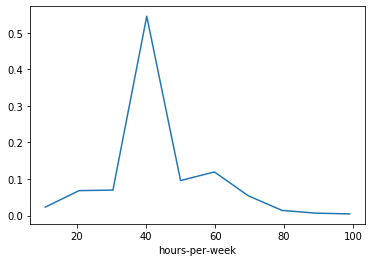

In [32]:
counts, bin_edges = np.histogram(df['hours-per-week'], bins=10,density = True)
plt.xlabel('hours-per-week')
pdf = counts/(sum(counts))
print("pdf=",pdf);
print("bin_edges=",bin_edges);
plt.plot(bin_edges[1:],pdf);

# BIVARIATE ANALYSIS

#   1. SCATTER  PLOT  

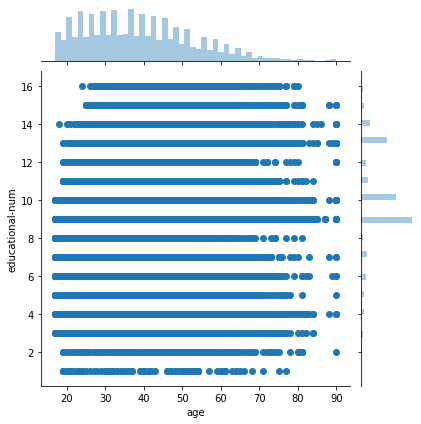

In [9]:
#  scatter plot between age and educational-num
sns.jointplot(x= 'age',y='educational-num',data=df,kind='scatter')

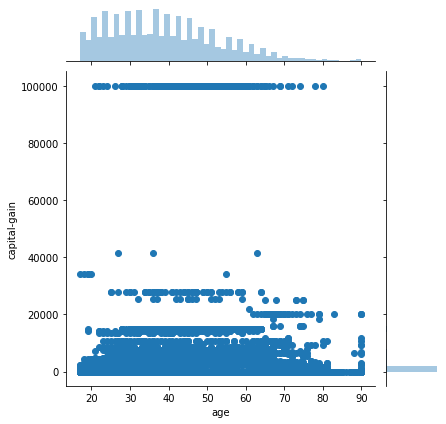

In [10]:
 # scatter plot between age and capital-gain
sns.jointplot(x= 'age',y='capital-gain',data=df,kind='scatter')

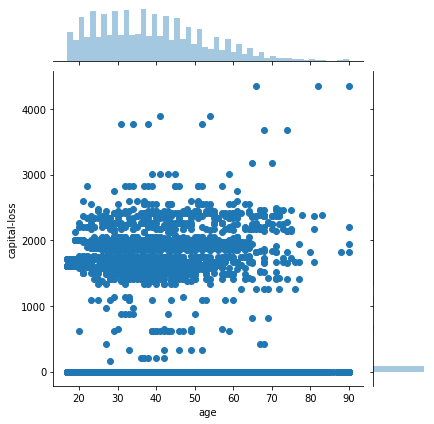

In [11]:
#  scatter plot between age and capital-loss
sns.jointplot(x= 'age',y='capital-loss',data=df,kind='scatter')

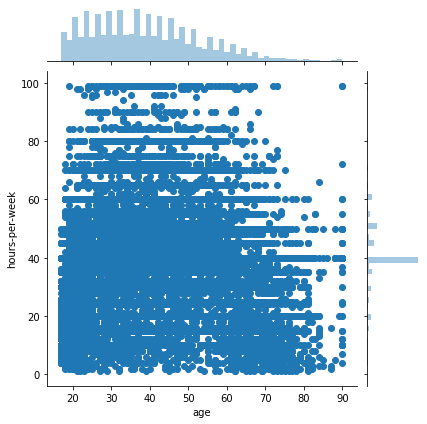

In [12]:
 # scatter plot between age and hours-per-week
sns.jointplot(x= 'age',y='hours-per-week',data=df,kind='scatter')

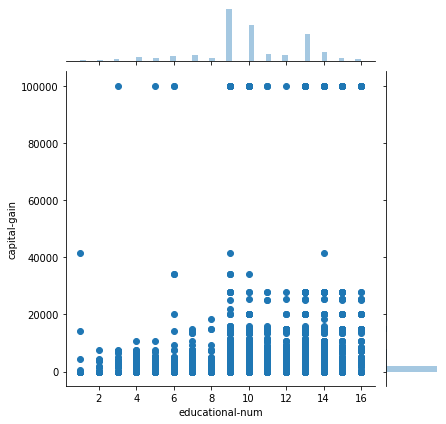

In [13]:
#  scatter plot between educational-num and capital-gain
sns.jointplot(x= 'educational-num',y='capital-gain',data=df,kind='scatter')

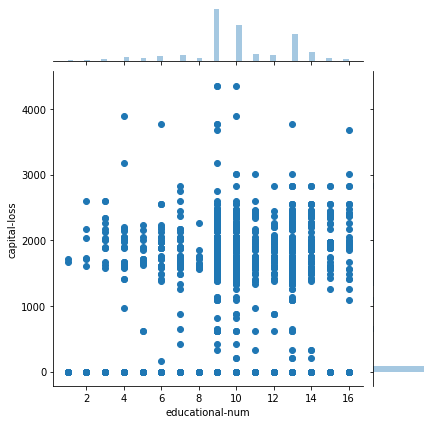

In [14]:
 # scatter plot between educational-num and capital-loss
sns.jointplot(x= 'educational-num',y='capital-loss',data=df,kind='scatter')#

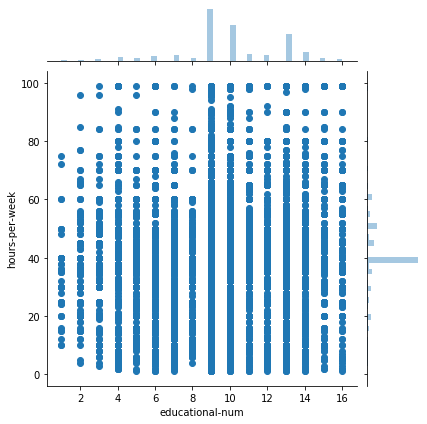

In [15]:
 # scatter plot between educational-num and hours-per-week
sns.jointplot(x= 'educational-num',y='hours-per-week',data=df,kind='scatter')

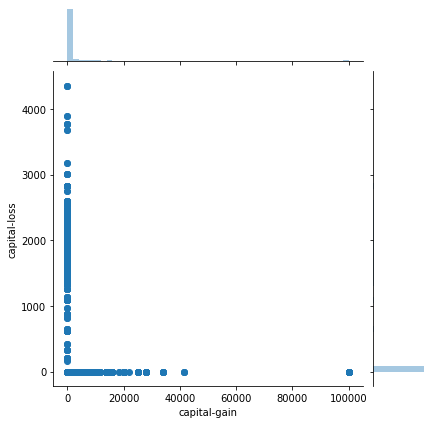

In [16]:
#  scatter plot between capital-gain and capital-loss
sns.jointplot(x= 'capital-gain',y='capital-loss',data=df,kind='scatter')

# OBSERVATION
    
    * Through this graph we can state that both capital and capital-loss can be zero.

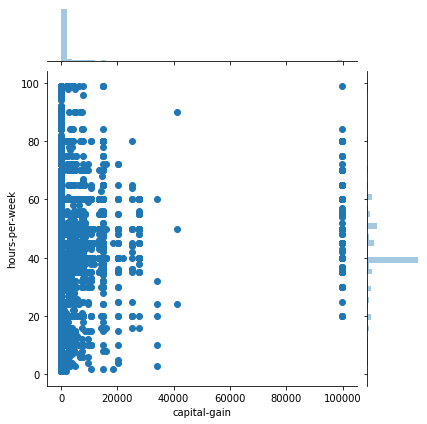

In [18]:
# scatter plot between capital-loss and hours-per-week
sns.jointplot(x= 'capital-gain',y='hours-per-week',data=df,kind='scatter')

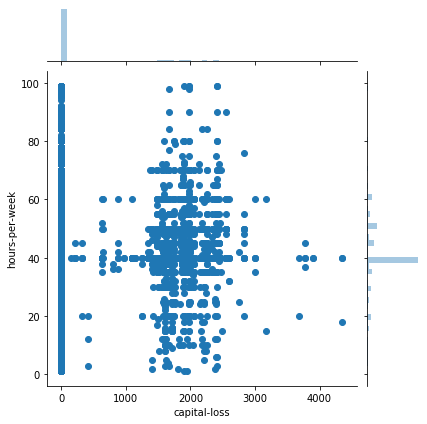

In [19]:
 # scatter plot between capital-loss and hours-per-week
sns.jointplot(x= 'capital-loss',y='hours-per-week',data=df,kind='scatter')

#  2. HEXBIN PLOT

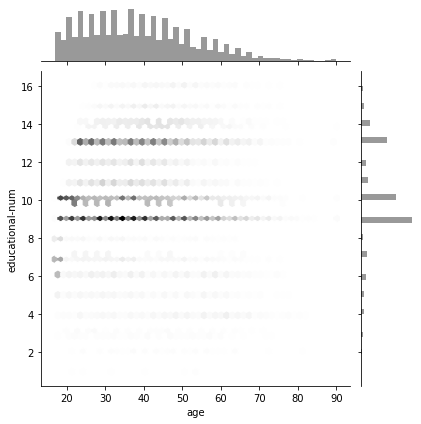

In [20]:
 # hexbin plot between age and educational-num
sns.jointplot(x= 'age',y='educational-num',data=df,kind='hexbin',color='k')

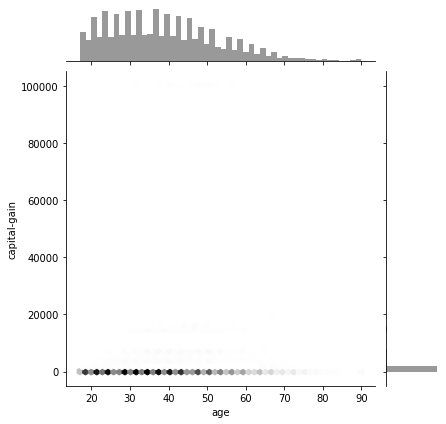

In [21]:
 # hexbin plot between age and capital-gain
sns.jointplot(x= 'age',y='capital-gain',data=df,kind='hexbin',color='k')

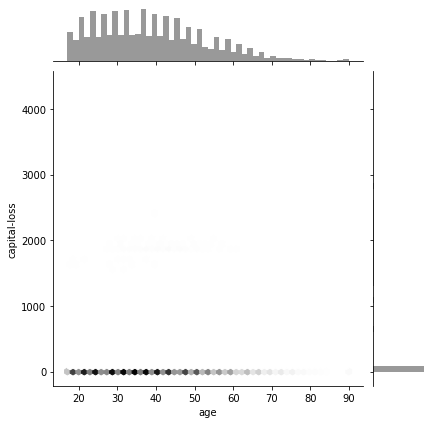

In [22]:
# hexbin plot between age and capital-gain
sns.jointplot(x= 'age',y='capital-loss',data=df,kind='hexbin',color='k')

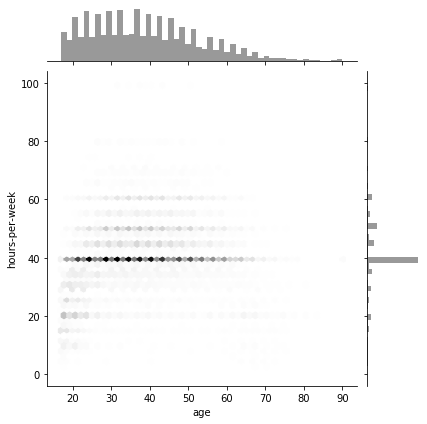

In [23]:
 # hexbin plot between age and hours-per-week
sns.jointplot(x= 'age',y='hours-per-week',data=df,kind='hexbin',color='k')

# OBSERVATION
    
   * Through this plot we can state the density is mainly between 40-60 hours-per-week where the density is between 20 to 65 
      year of age

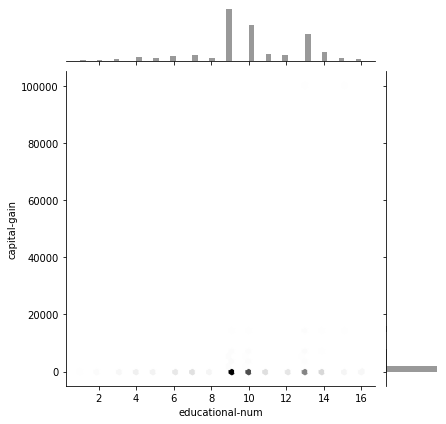

In [24]:
# hexbin plot between educational-num and capital-gain
sns.jointplot(x= 'educational-num',y='capital-gain',data=df,kind='hexbin',color='k')

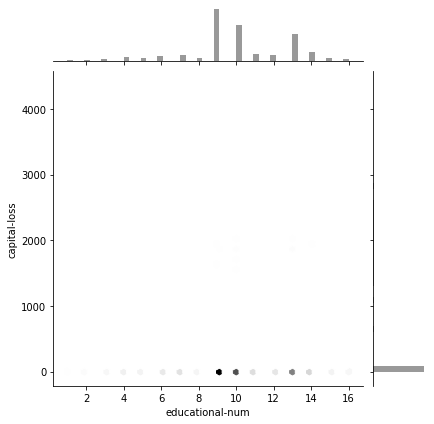

In [25]:
# hexbin plot between educational-num and capital-loss
sns.jointplot(x= 'educational-num',y='capital-loss',data=df,kind='hexbin',color='k')

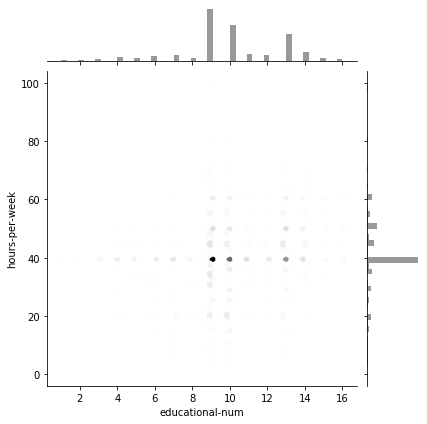

In [26]:
# hexbin plot between educational-num and hours-per-week
sns.jointplot(x= 'educational-num',y='hours-per-week',data=df,kind='hexbin',color='k')

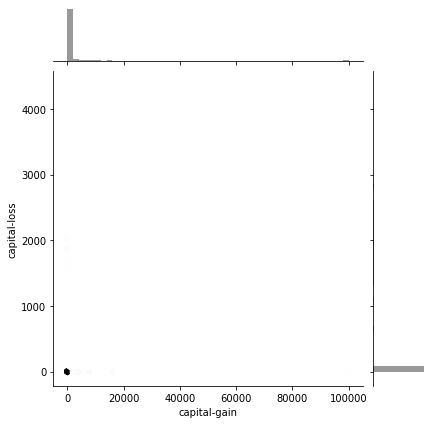

In [27]:
# hexbin plot between capital-gain and capital-loss
sns.jointplot(x= 'capital-gain',y='capital-loss',data=df,kind='hexbin',color='k')

# OBSERVATIONS
   
  * Through this plot we can say mainly of density lie at point 0.

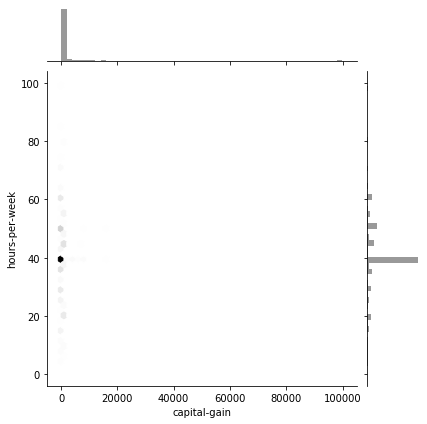

In [28]:
# hexbin plot between capital-gain and hours-per-week
sns.jointplot(x= 'capital-gain',y='hours-per-week',data=df,kind='hexbin',color='k')

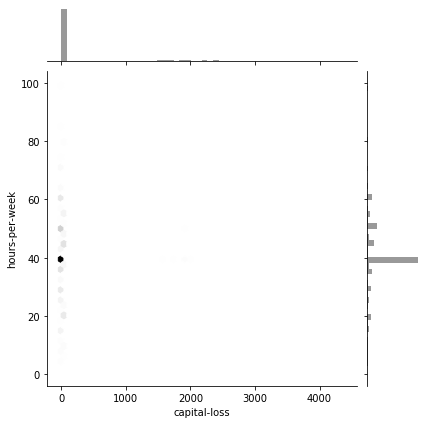

In [29]:
# hexbin plot between capital-loss and hours-per-week
sns.jointplot(x= 'capital-loss',y='hours-per-week',data=df,kind='hexbin',color='k')

#  3. PAIR PLOT
  

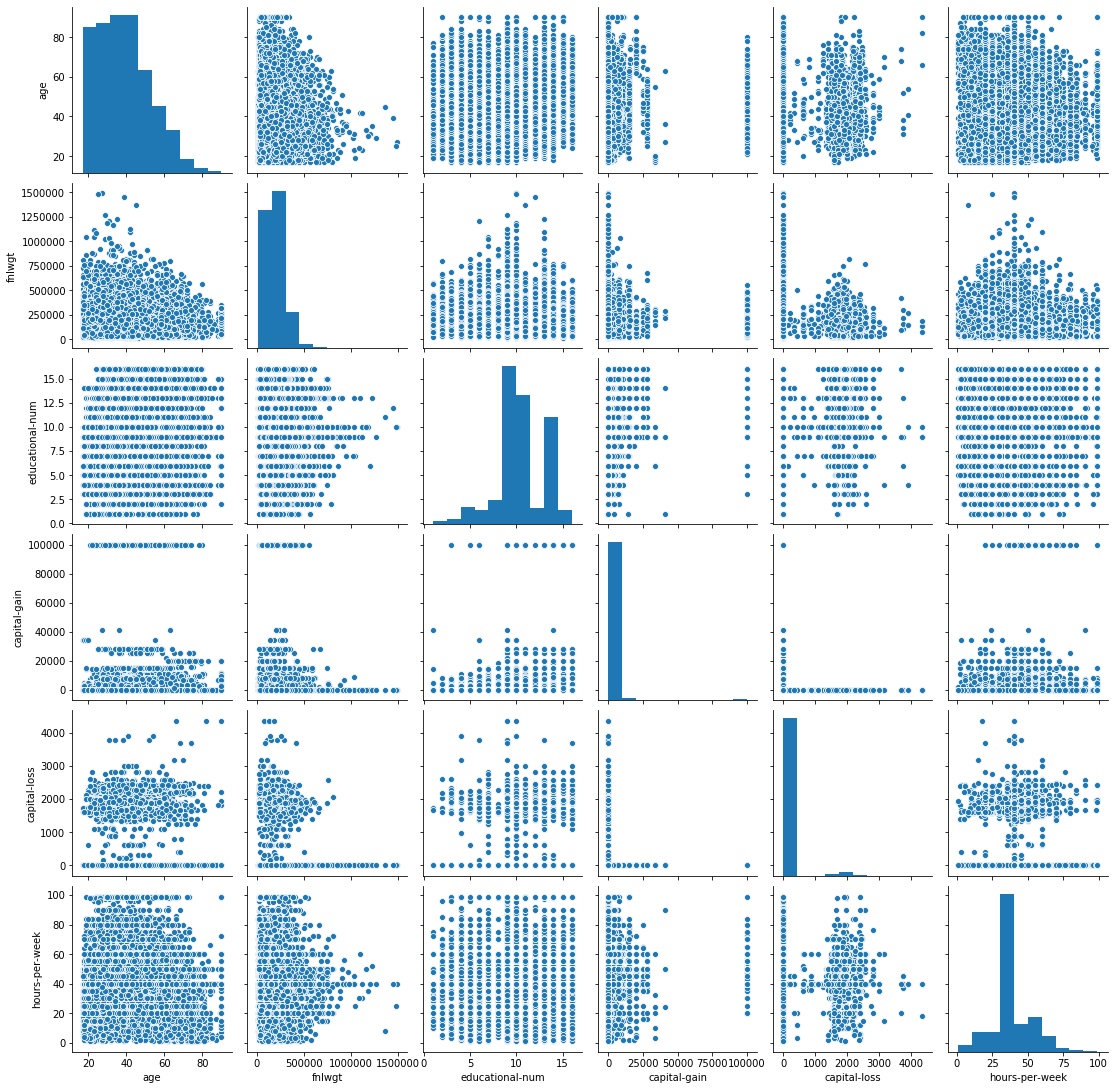

In [31]:

adult=pd.read_csv('adult.csv')
sns.pairplot(adult)



# OBSERVATON

   * The individual of age betweeen 18 to 70 works most of the hours per week get the more paid income i.e. greater than 50k.
   
   * we can also state that from age attribute that most of the people earns greater than 50k.
   
   * income group who earns >50k have flexible working hours.
   
   * individuals having capital gain/profit or no profit earns greater than 50k, whereas individuals having capital 
     loss or no loss mostly earns lower than 50k.
     
   *  most of the individuals more educational numbers have more income or greater than 50k. 
   

# 4.BOXPLOT

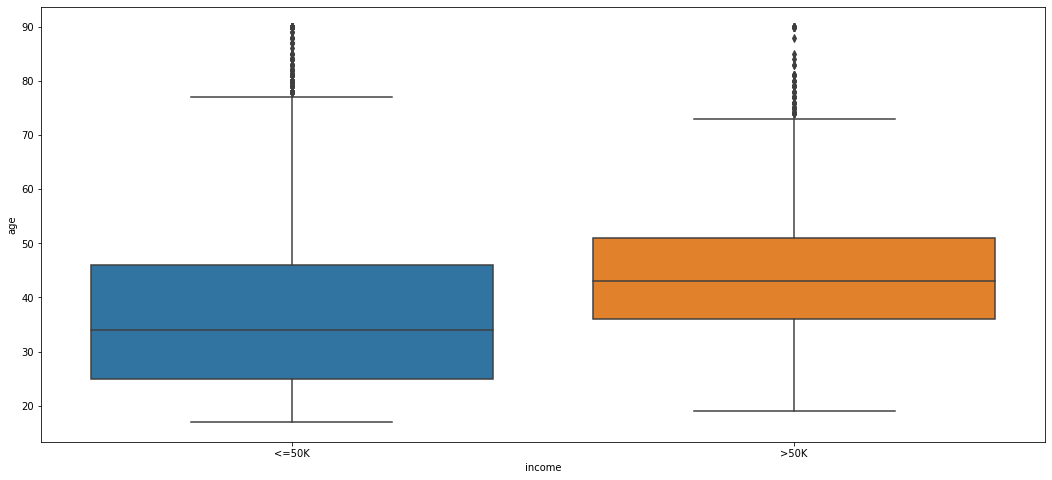

In [5]:
# Boxplot between income and age
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='age',data=df)
plt.show()

# OBSERVATION

  * outliers are present in both the income(<=50k and >50k).
  * Income group of <=50k has lower median than the income group of >50k.

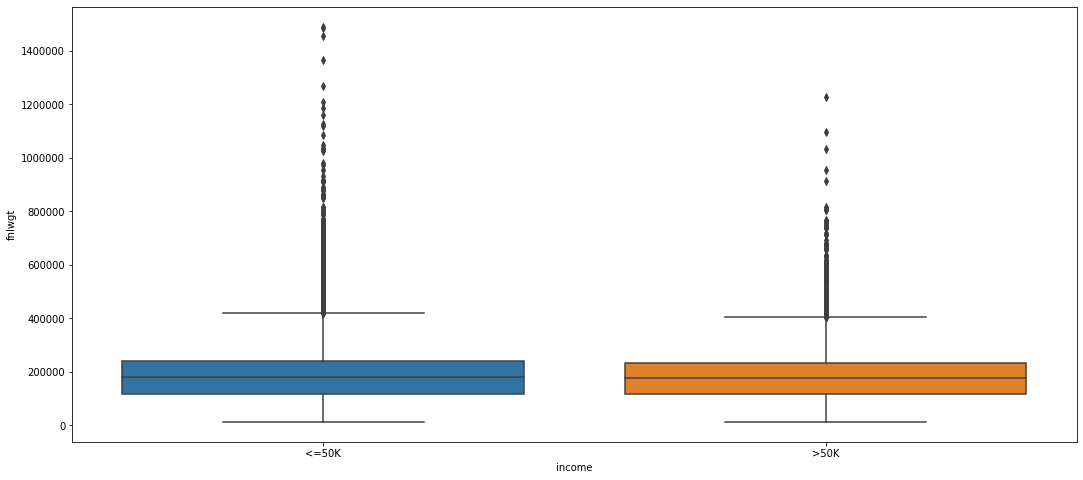

In [6]:
# Boxplot between income and fnlwgt
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='fnlwgt',data=df)
plt.show()

# OBSERVATIONS

  * Outliers are present in both the income graph.

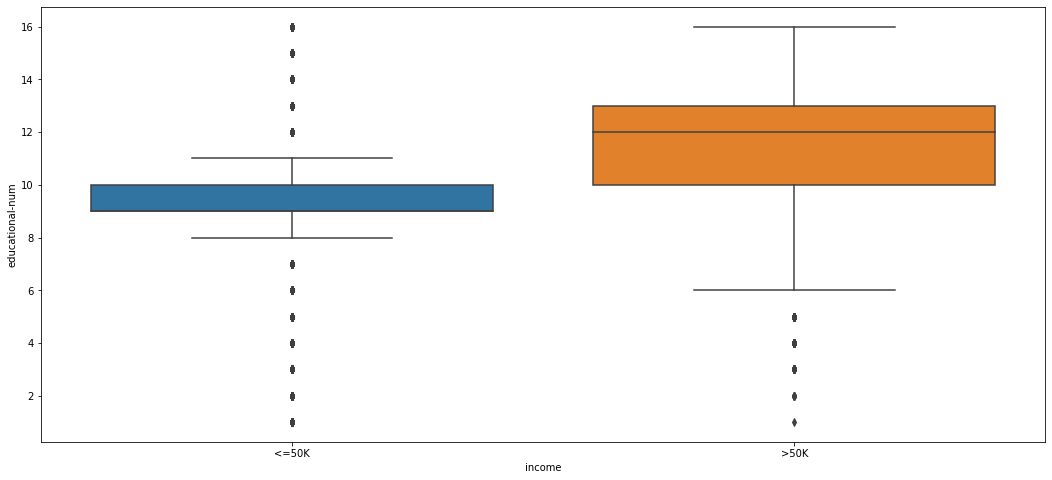

In [7]:
# Boxplot between income and educational-num
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='educational-num',data=df)
plt.show()

# OBSERVATIONS

   * Outliers are present both income graph . 

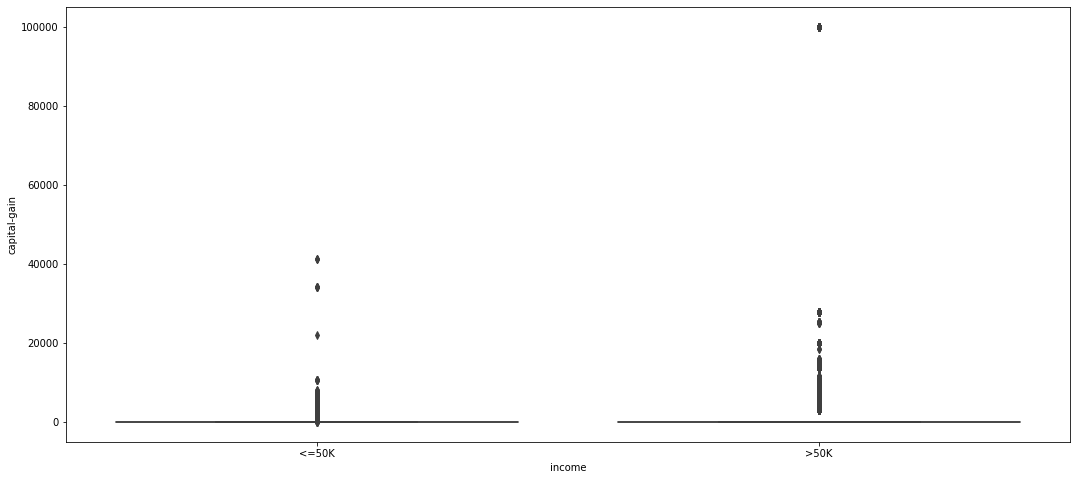

In [8]:
# Boxplot between income and capital-gain
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='capital-gain',data=df)
plt.show()

# OBSERVATIONS
   
   * most of the capital-gain values is accumulated at the 0 for both the income group.
  
  

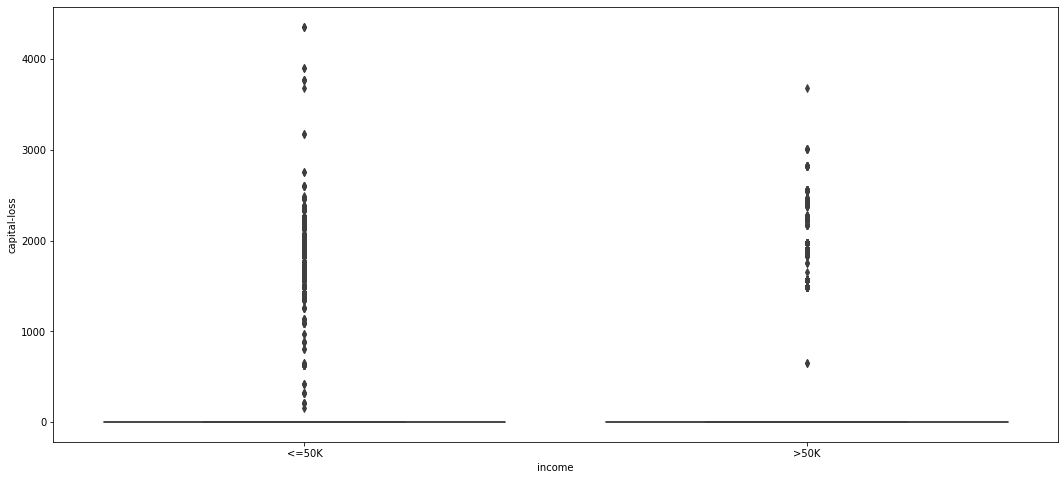

In [9]:
# Boxplot between income and capital-loss
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='capital-loss',data=df)
plt.show()

# OBSERVATION
  
   This boxplot is similar to the capital-gain boxplot.

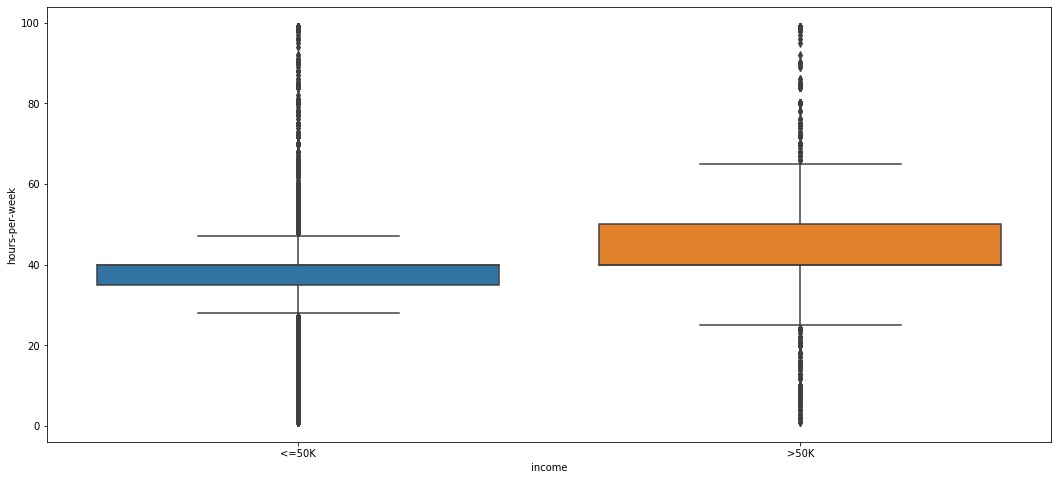

In [10]:
# Boxplot between income and hours-per-week
plt.figure(figsize=(18,8))
sns.boxplot(x='income',y='hours-per-week',data=df)
plt.show()

# OBSERVATION
 
  * The median hours-per-week of income group who earns >50k is greater than the income group who earns <=50k.

# 5.BARPLOTS

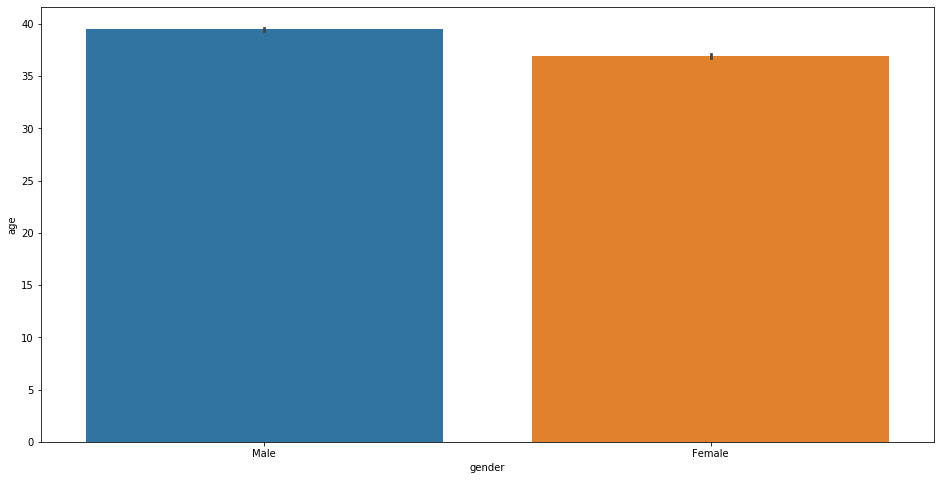

In [24]:
# barplot between gender and age
plt.figure(figsize=(16,8))
sns.barplot(x='gender',y='age',data=df)


# OBSERVATIONS
 
 
 * Through the bar plot we can say that in both group of gender (male and female) the individual come under.

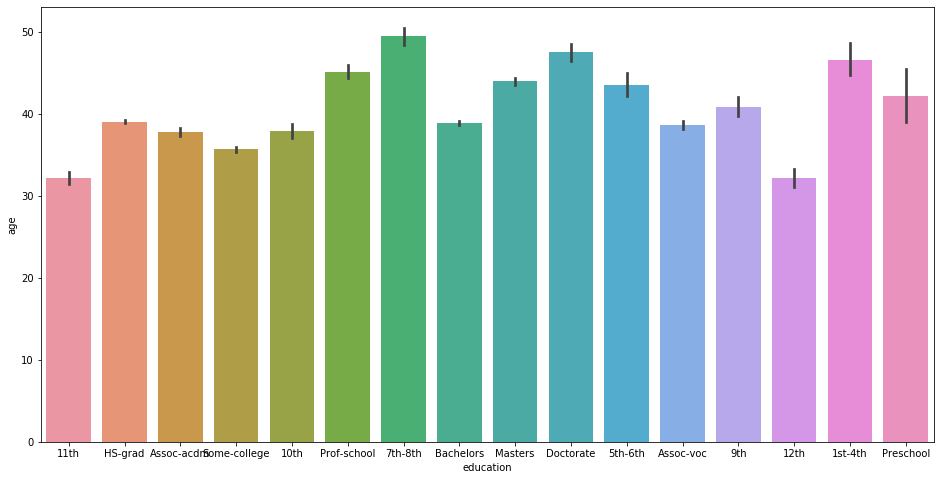

In [12]:
# barplot between education and age
plt.figure(figsize=(16,8))
sns.barplot(x='education',y='age',data=df)


# OBSERVATION
 * People above 40 yearsof age are belonging to the prof-school,7th-8th,masters,doctorate,5th-6th,and 1st-4th.

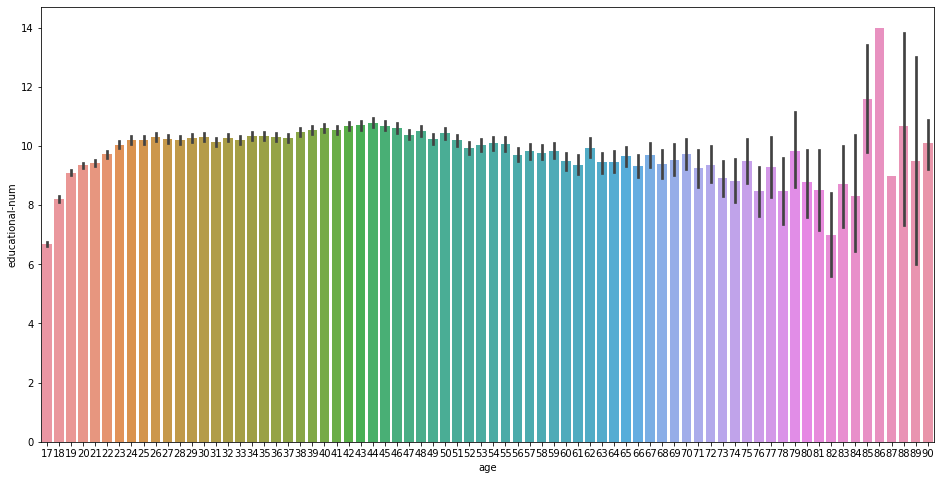

In [17]:
# barplot between education-num and age
plt.figure(figsize=(16,8))
sns.barplot(x='age',y='educational-num',data=df)


# OBSERVATION

 * people of age 86 has maximum number of educational-num of approximately 13.9.
 * people of age 17 has minimum of educational-num of 6.8.

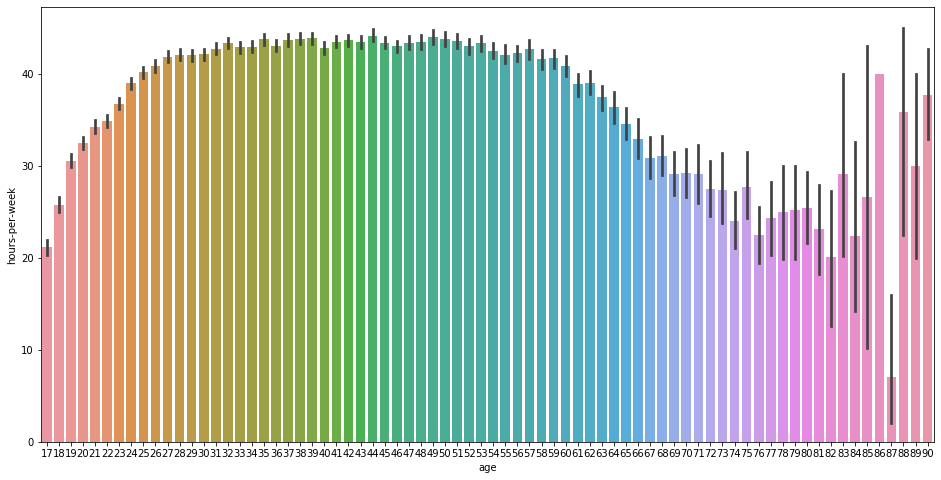

In [18]:
# barplot between hours-per-week and age
plt.figure(figsize=(16,8))
sns.barplot(x='age',y='hours-per-week',data=df)


# OBSERVATION
  
  * People between age 25 to 58 works 40 hours-per-week.

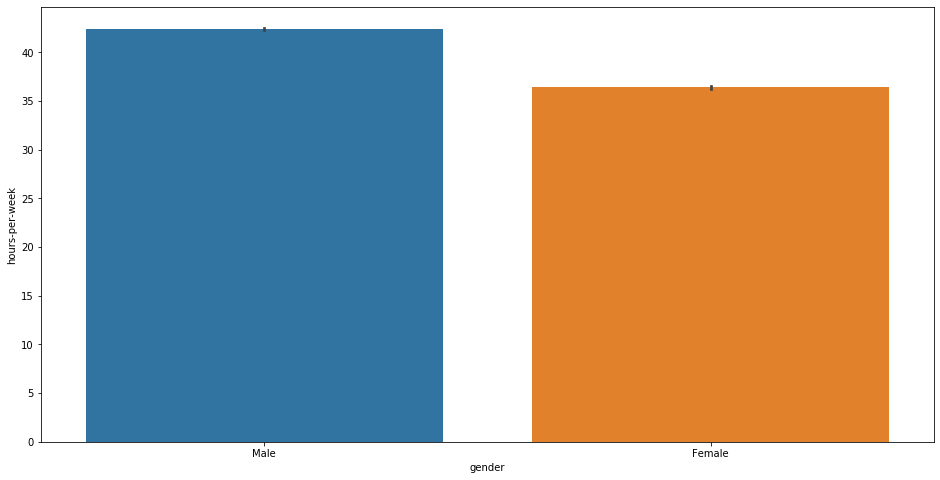

In [26]:
# barplot between gender and hours-per-week
plt.figure(figsize=(16,8))
sns.barplot(x='gender',y='hours-per-week',data=df)


# OBSERVATION

   * males work more than 40 hours-per-week.it means that males works more than female.

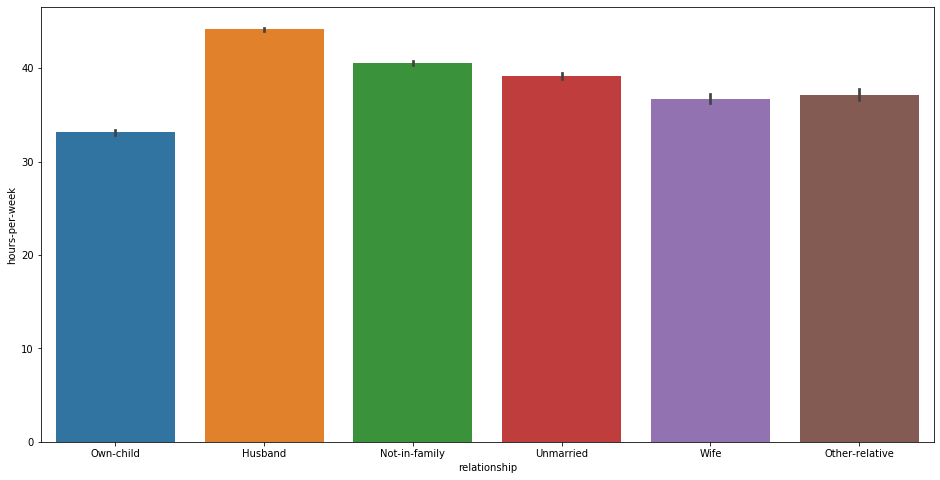

In [25]:
# barplot between relationship  and hours-per-week
plt.figure(figsize=(16,8))
sns.barplot(x='relationship',y='hours-per-week',data=df)


# OBSERVATION
  
  * we can observe from above barplot that individuals having the relationship with husband earns more income

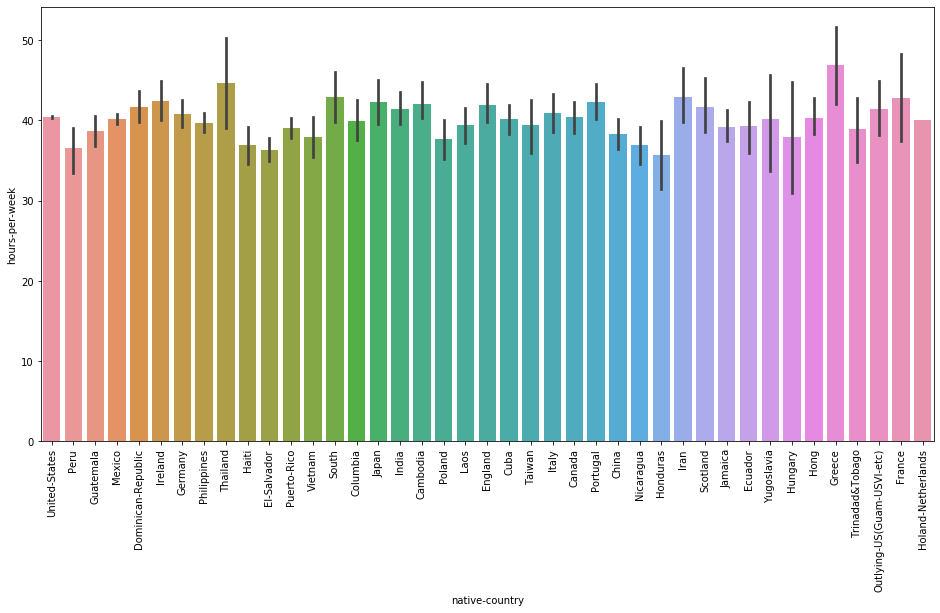

In [20]:
# barplot between native-country and hours-per-week
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x='native-country',y='hours-per-week',data=df)


# OBSRVATION
   * el-salvador is the country were works for lesshours-per-week.
   
   
   * Greece is the country were works for more hours-per-week.

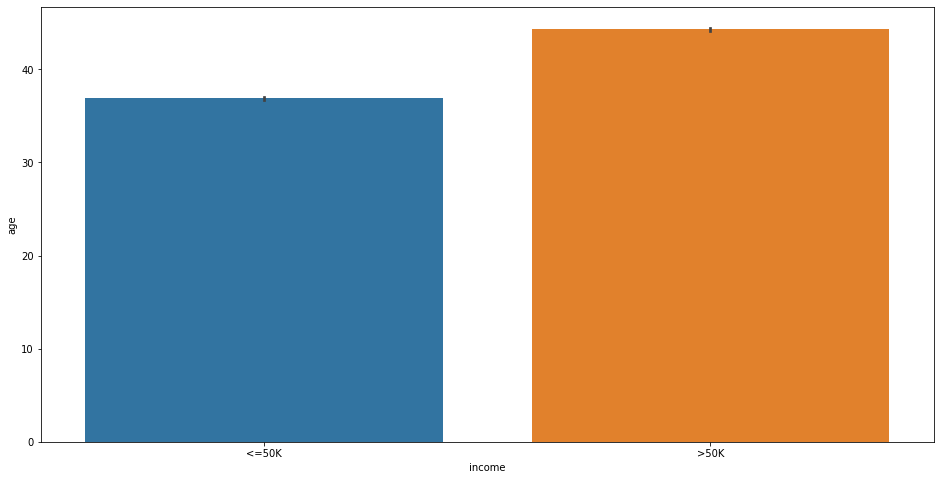

In [21]:
# barplot between income and age
plt.figure(figsize=(16,8))
sns.barplot(x='income',y='age',data=df)


# OBSERVATION

    * People of age greater than 40 years earn more than 50k.
    * people of age less than 40 years earn less than or equal to 50k.

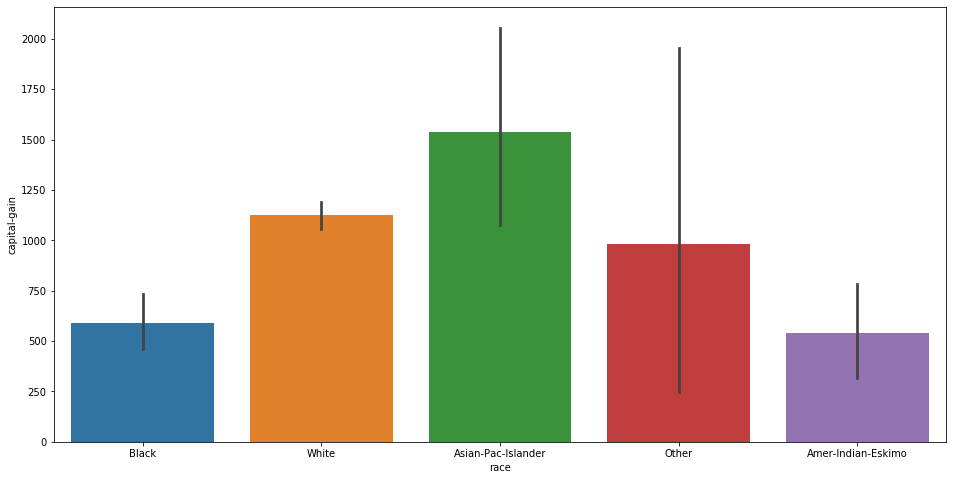

In [22]:
# barplot between race  and capital-gain
plt.figure(figsize=(16,8))
sns.barplot(x='race',y='capital-gain',data=df)


# OBSERVATION
    
  * asian-pac-islander  race has max capitalization.

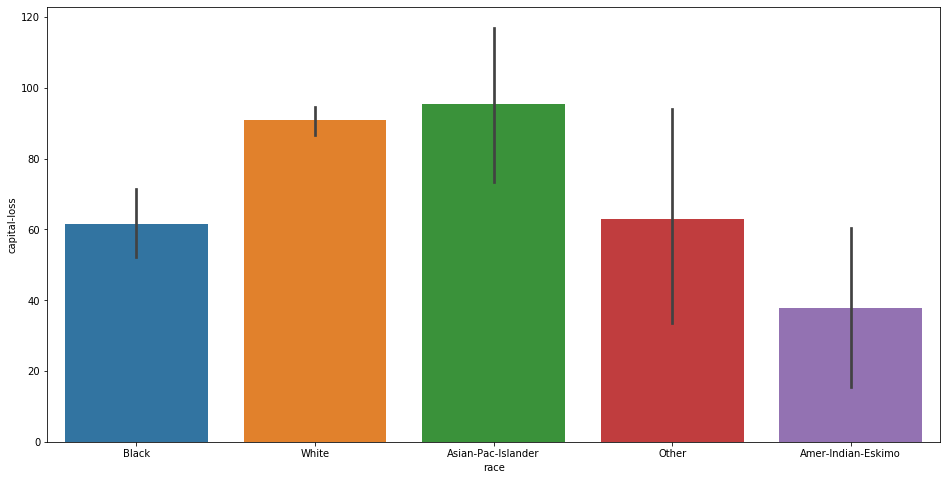

In [23]:
# barplot between race  and capital-loss
plt.figure(figsize=(16,8))
sns.barplot(x='race',y='capital-loss',data=df)


# OBSERVATION
    
  * amer-india-eskimo has minimum capitalization.

#     CONCLUSION 


 * The analysis confirmed (and quantified) what is considered commom sense :

Age ,education,occupation,marital status ( or relationship kind) are good for predicting income ( above a certain threshold).
using the association rules we see for examples that

1. if a persion earns more than 50k he is very likely to be a married man with large number of years of education.

2. single parents ,younger than 25 years , who studied less than 10 years ,aand were -married make less than 50k.




 * females have more flexible working hours-per-week in the income groups who earns <=50k whereas males have more flexbile 
   working hours- per- week in income groups who earns >50k.
   
   
   
   
 * education-num atttribute is affecting the target. It is not hard to notice that the in group proportion ofmaking greater        than 50k a year increase as the years of education increases. for those who do not have any forms of college education(less    than or equal to 8 years of education),less than 10% have an annual income of greater than 50k.while for those with            doctorate degrees, nearly 3 out of 4 makes greater than  50k a year.
 
 
 
 
 * capital-gain and capital- loss have most of the outliers.we observe that the tendency of capital-gain and capital-loss is      same.The mean and median for people having an income of more than 50k a year is bigger than that of people earning less      than 50k    a year. this might be due to the fact that people with higher income are more prone to invest more money more    often.This leads to higher chances of not only good but also bad investments resulting in bigger losses.
 
 
 
 
 
 *  The age of people is between 17 to 90 that is minimum and maximum age is 17 and 90 respectively.younger age people work         more  than old age people. we see that the majority of people earning  more than 50k a year are between 33 and 55 years       old, whereas the greatest number   of  people who earn less than 50k a year are between 18 and 45.
 
 
 
 
 *  The workclass and occupation attribute have more number of misssing value thathas been treated above by dropping theem as
    there were less number of rows containing missing value in the whole dataset so the dataset is not affected by it.
 

# NORMALIZATION  USING  MINMAXSCALER

In [12]:
from sklearn.preprocessing import MinMaxScaler

* we are import minmaxscaler from a python library called sklearn.
* minmaxscaler transform features by scaling each feature to a given range.

In [13]:
col=[]
for i in df:
    if df[i].dtype=="int64":
        col.append(i)
    scalar = MinMaxScaler()
    df[col]=scalar.fit_transform
    (df[col])
        

* Now we are using pandas function pd.get_ddummies for the categorical variable to convert data ino dummy variable.

In [14]:
workclass = pd.get_dummies(df ['workclass'],drop_first=True)

In [15]:
education = pd.get_dummies(df ['education'],drop_first=True)

In [16]:
marital_status = pd.get_dummies(df ['marital-status'],drop_first=True)

In [17]:
occupation = pd.get_dummies(df ['occupation'],drop_first=True)

In [18]:
relationship = pd.get_dummies(df ['relationship'],drop_first=True)

In [19]:
race = pd.get_dummies(df ['race'],drop_first=True)

In [20]:
native_country = pd.get_dummies(df ['native-country'],drop_first=True)

In [21]:
from sklearn.preprocessing  import LabelEncoder
scaler= LabelEncoder() 

* The label encoder from the python library sklearn using the attribute gender which having the datatype 'object' and convert
  variable into binary ,since gender attribute have 2 variable in it.

In [22]:
# df.gender.replace (to_replace="male",value=1,inplace=True)

# df.gender.replace(to_replace="female",value=0,inplace=True)

male = scaler.fit_transform(df.gender)
male_col=pd.DataFrame(male,columns=['Male'])

* for target attribute we can also use label encoder or pandas function 'replace'to change the label to binary

In [23]:
# df.income.replace (to_replace="<=50k",value=1,inplace=True)

# df.income.replace(to_replace=">50k",value=0,inplace=True)

income = scaler.fit_transform(df.income)
income_col=pd.DataFrame(male,columns=['>50k'])

In [24]:
obj = []
for i in df:
    if df[i].dtype =="object":
        obj.append(i)

* Now dropping the object datatype col. as we have created the dummies of them.

In [25]:
df.drop(obj,axis=1,inplace=True)

In [26]:
df=pd.concat([workclass,education,marital_status,occupation,relationship,race,native_country],axis=1)
df=df.reset_index(drop=True,inplace=False)
df=pd.concat([df,male_col,income_col],axis=1)

* we are using pandas concat to concatenate the columns into the dataframe

In [27]:
df

,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,...,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Male,>50k
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45218,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
45219,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45220,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
